In [106]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
import plotly.graph_objs as go

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel('2021금융데이터 경진대회_데이터셋_한국투자증권(원본).xlsx')

In [3]:
df.columns =  ['id', 'day', 'gender', 'age', 'adress', 'time', 
                'stock_code', 'stock_name', 'kospi_kosdaq', 'sell_buy', 
                'order_code', 'order_price', 'order_volume', 'true_order_volume', 'true_order_price', 
                'before_close', 'start', 'high', 'low', 'close', 'volume', 'volume_price', 'high_yn', 'low_yn']

In [4]:
df

,id,day,gender,age,adress,time,stock_code,stock_name,kospi_kosdaq,sell_buy,order_code,order_price,order_volume,true_order_volume,true_order_price,before_close,start,high,low,close,volume,volume_price,high_yn,low_yn
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845935,A0009999,20200331,1,20,충북,2,00000A043200,파루,3,2,1,2020,150,150,303000,1995,2035,2135,1990,2030,2764564,5682482755,N,N
845936,A0009999,20200325,1,20,충북,2,00000A068760,셀트리온제약,3,1,1,63400,8,8,507200,57300,61700,70600,58700,60300,8892944,560929000000,N,N
845937,A0009999,20200330,1,20,충북,1,00000A038290,마크로젠,3,2,1,38800,25,25,970000,38900,40050,40800,37500,40400,1912985,75631708300,N,N
845938,A0009999,20200323,1,20,충북,1,00000A000660,에스케이하이닉스보통주,2,1,1,69200,8,8,553600,74800,69700,71600,68000,69400,8037426,560505000000,N,N


In [5]:
df['adress'].unique()

array(['경기', '경남', '서울', '광주', '대전', '울산', '대구', '충북', '부산', '인천', '경북',
       '충남', '강원', '전북', '전남', '제주'], dtype=object)

In [6]:
len(df['stock_name'].unique())

1971

In [7]:
df['day'] = pd.to_datetime(df['day'],format='%Y%m%d')

In [8]:
df.sort_values('day', inplace=True)
df.head()

,id,day,gender,age,adress,time,stock_code,stock_name,kospi_kosdaq,sell_buy,order_code,order_price,order_volume,true_order_volume,true_order_price,before_close,start,high,low,close,volume,volume_price,high_yn,low_yn
711180,A000592,2020-01-20,2,20,서울,2,00000A192820,코스맥스보통주,2,2,1,87500,20,20,1750000,87600,87500,91300,85900,86800,269228,23825292800,N,N
83205,A00010330,2020-01-20,2,20,서울,2,00000A042510,라온시큐어,3,2,1,2860,2,2,5710,2910,2895,2910,2835,2850,234253,670307175,N,N
311689,A00016551,2020-01-20,2,50,대구,2,00000A005930,삼성전자보통주,2,2,1,62500,1,1,62500,61300,62000,62800,61700,62400,12440366,775520000000,N,N
293034,A00015886,2020-01-20,2,40,서울,3,00000A005930,삼성전자보통주,2,2,1,62500,3,3,187500,61300,62000,62800,61700,62400,12440366,775520000000,N,N
59805,A0005442,2020-01-20,2,20,서울,2,00000A005930,삼성전자보통주,2,2,1,62700,1,1,62700,61300,62000,62800,61700,62400,12440366,775520000000,N,N


In [9]:
df2 = df.set_index('day')

In [10]:
def plot_candlestick(df):
    data = Candlestick(x=df2.index, open=df2['start'], high=df2['high'], low=df2['low'], close=df2['close'])
    figure = Figure(data=data)
    iplot(figure)

In [114]:
volume_price_df = pd.DataFrame(df.groupby('day')['volume_price'].sum())
px.line(volume_price_df, x=volume_price_df.index, y='volume_price', title='일별 거래대금')

In [12]:
volume_price_df[['volume_price']].idxmax()

volume_price   2020-03-27
dtype: datetime64[ns]

In [13]:
volume_price_df[['volume_price']]

,volume_price
day,
2020-01-20,23171347715453
2020-01-21,43814148819654
2020-01-22,47979396764501
2020-01-23,125023847190241
2020-01-28,345523183109685
2020-01-29,283925420638400
2020-01-30,659693776352771
2020-01-31,535771128027554
2020-02-03,648021371347992


In [14]:
march_27 = df[df['day']=='2020-03-27']

In [15]:
march_27['stock_name'].value_counts()

씨젠           5999
삼성전자보통주      2472
파미셀보통주       2242
신풍제약보통주      1962
수젠텍          1898
             ... 
디케이락            1
에스케이씨 솔믹스       1
케이씨코트렐보통주       1
골프존             1
대한뉴팜            1
Name: stock_name, Length: 1549, dtype: int64

In [16]:
march_27[march_27['stock_name']=='씨젠']

,id,day,gender,age,adress,time,stock_code,stock_name,kospi_kosdaq,sell_buy,order_code,order_price,order_volume,true_order_volume,true_order_price,before_close,start,high,low,close,volume,volume_price,high_yn,low_yn
295700,A00015953,2020-03-27,1,20,전남,3,00000A096530,씨젠,3,1,1,115800,41,41,4747800,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
258851,A00015020,2020-03-27,1,30,인천,3,00000A096530,씨젠,3,1,1,116400,72,72,8380800,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
498394,A00021794,2020-03-27,2,20,인천,3,00000A096530,씨젠,3,2,1,118000,1,1,118000,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
819777,A0009228,2020-03-27,2,30,경기,1,00000A096530,씨젠,3,1,1,139700,9,9,1257300,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
258846,A00015020,2020-03-27,1,30,인천,3,00000A096530,씨젠,3,2,5,148800,72,72,8316000,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799145,A0008587,2020-03-27,2,30,서울,3,00000A096530,씨젠,3,1,5,148800,3,3,294000,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
540590,A00023148,2020-03-27,1,40,전북,2,00000A096530,씨젠,3,1,1,136300,51,51,6951300,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
799135,A0008587,2020-03-27,2,30,서울,3,00000A096530,씨젠,3,2,5,148800,1,1,107900,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
556578,A00023519,2020-03-27,2,30,충북,2,00000A096530,씨젠,3,2,1,137000,5,5,685000,114500,125500,141400,97900,115900,19626058,2456040000000,N,N


In [17]:
df['week'] = df['day'].dt.week
df['weekday'] = df['day'].dt.weekday

<ipython-input-17-419bcc590a4f>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [18]:
df.groupby(df['weekday'])['volume_price'].idxmax()

weekday
0    793353
1    727238
2    354874
3    559819
4    841473
Name: volume_price, dtype: int64

In [19]:
age_max_stock = pd.DataFrame(df.groupby('age')['stock_name'].value_counts()).rename(columns={'stock_name':'count'})

In [20]:
age_max_stock.reset_index(inplace=True)

In [21]:
#연령대별 가장 높은 주식 종목 - 씨젠(삼성전자 제외)
#조사한 주식 종목 1971개, 30대 1951 종목을 사서 가장 다양한 분포를 보였으며 50대가 제일 적었음 30,40,20,50대 순
age_max_stock[age_max_stock['age']==40]

,age,stock_name,count
3836,40,삼성전자보통주,16992
3837,40,삼성전자1우선주,7197
3838,40,씨젠,7124
3839,40,신풍제약보통주,3002
3840,40,이원다이애그노믹스,2822
...,...,...,...
5722,40,한국주철관공업보통주,1
5723,40,한국컴퓨터,1
5724,40,한양증권보통주,1
5725,40,한일시멘트보통주,1


In [22]:
age_order_style = pd.DataFrame(df.groupby('age')['order_code'].value_counts()).rename(columns={'order_code':'count'})
age_order_style.reset_index(inplace=True)
age_order_style 

,age,order_code,count
0,20,1,189402
1,20,5,11617
2,30,1,307412
3,30,5,23285
4,40,1,198890
5,40,5,11297
6,50,1,96021
7,50,5,8016


In [115]:
import plotly.express as px
px.bar(age_order_style, x='age', y='count', color='order_code', title='지정가 & 시장가 비율')

In [24]:
#17%, 14%, 18%, 13%

In [25]:
stock_df = pd.read_csv('상장법인목록.csv')

In [26]:
stock_df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,일진하이솔루스,271940,그외 기타 운송장비 제조업,"수소승용용기, 매연저감장치 등",2021-09-01,12월,안홍상,http://hysolus.co.kr,전라북도
1,디앤디플랫폼리츠,377190,부동산 임대 및 공급업,부동산 투자 및 관리,2021-08-27,03월,이양원,http://dndplatformreit.com/,서울특별시
2,바이젠셀,308080,자연과학 및 공학 연구개발업,"면역세포치료제 (면역항암제, 면역조절치료제 등)",2021-08-25,12월,김태규,http://www.vigencell.com/kr/index.asp,서울특별시
3,아주스틸,139990,1차 철강 제조업,"프리미엄 가전용 고품질 컬러강판, 건자재 등",2021-08-20,12월,이학연,http://www.ajusteel.com,경상북도
4,롯데렌탈,89860,운송장비 임대업,"렌터카, 카셰어링(그린카), 중고차매매, 일반렌탈(측정기,OA, 리프트 등)",2021-08-19,12월,김현수,http://www.lotterental.com/,경기도
...,...,...,...,...,...,...,...,...,...
2452,CJ대한통운,120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시
2453,메리츠화재,60,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2454,경방,50,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2455,유수홀딩스,700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [27]:
stock_df[stock_df['회사명']=='씨젠']

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
1060,씨젠,96530,의료용품 및 기타 의약 관련제품 제조업,"호흡기성 병원체 검사제품, 성감염증원인균 검사제품",2010-09-10,12월,천종윤,http://seegene.co.kr,서울특별시


In [28]:
df3 = df.copy()

In [29]:
day_sell_type = pd.DataFrame(df.groupby('day')['sell_buy'].value_counts()).rename(columns={'sell_buy':'count'})
day_sell_type.reset_index(inplace=True)

In [116]:
#일별 매수, 매도 추이 그래프
px.line(day_sell_type, x='day', y='count', color='sell_buy', title='일별 매수, 매도 추이 그래프')

<AxesSubplot:ylabel='id'>

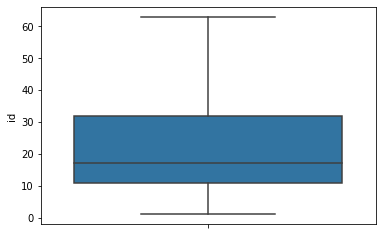

In [32]:
sns.boxplot(y=df['id'].value_counts(), showfliers=False)

In [119]:
td_df = pd.DataFrame(df['id'].value_counts())
td_df = td_df.reset_index().rename(columns={'index':'id', 'id':'trading_count'})

trading_df = pd.merge(df, td_df, how='left', on='id')

In [121]:
trading_df2 = trading_df[trading_df['trading_count']<=62]

In [122]:
print('전체투자자 수', len(df['id'].unique()))
print('개미투자자 수', len(trading_df2['id'].unique()))
print('차이', len(df['id'].unique()) - len(trading_df2['id'].unique()))

전체투자자 수 24989
개미투자자 수 22261
차이 2728


<AxesSubplot:>

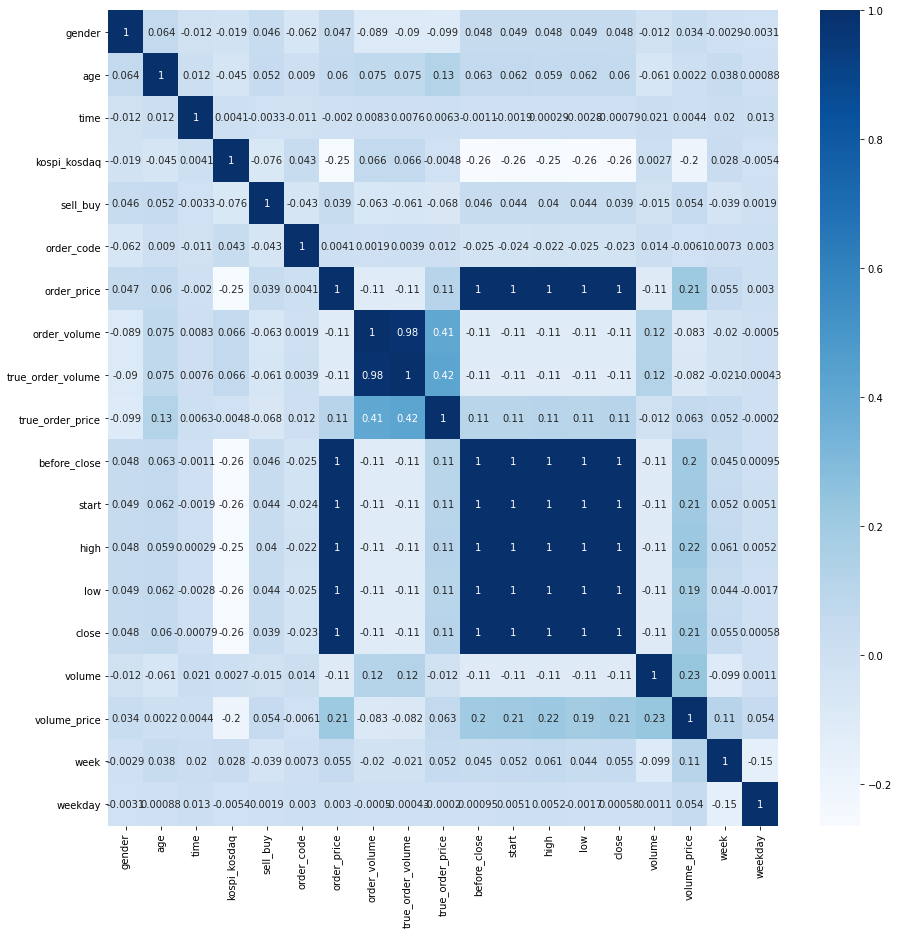

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [37]:
trading_df

,id,day,gender,age,adress,time,stock_code,stock_name,kospi_kosdaq,sell_buy,order_code,order_price,order_volume,true_order_volume,true_order_price,before_close,start,high,low,close,volume,volume_price,high_yn,low_yn,week,weekday,trading_count
0,A000592,2020-01-20,2,20,서울,2,00000A192820,코스맥스보통주,2,2,1,87500,20,20,1750000,87600,87500,91300,85900,86800,269228,23825292800,N,N,4,0,53
1,A00010330,2020-01-20,2,20,서울,2,00000A042510,라온시큐어,3,2,1,2860,2,2,5710,2910,2895,2910,2835,2850,234253,670307175,N,N,4,0,17
2,A00016551,2020-01-20,2,50,대구,2,00000A005930,삼성전자보통주,2,2,1,62500,1,1,62500,61300,62000,62800,61700,62400,12440366,775520000000,N,N,4,0,14
4,A0005442,2020-01-20,2,20,서울,2,00000A005930,삼성전자보통주,2,2,1,62700,1,1,62700,61300,62000,62800,61700,62400,12440366,775520000000,N,N,4,0,8
6,A0006004,2020-01-20,1,20,부산,3,00000A030790,비케이탑스보통주,2,2,1,411,1,1,411,397,385,459,373,412,78164184,32893042230,N,N,4,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845917,A00016993,2020-03-31,1,30,광주,1,00000A009460,한창제지보통주,2,1,1,3600,150,150,543000,3430,3720,3995,3430,3710,27082512,101284000000,N,N,14,1,13
845918,A00016993,2020-03-31,1,30,광주,2,00000A009460,한창제지보통주,2,1,1,3685,100,100,369000,3430,3720,3995,3430,3710,27082512,101284000000,N,N,14,1,13
845922,A0001534,2020-03-31,1,30,광주,2,00000A019170,신풍제약보통주,2,1,1,15000,48,48,720000,14750,15250,16450,13750,14400,18163049,271505000000,N,N,14,1,34
845938,A00016993,2020-03-31,1,30,광주,3,00000A009460,한창제지보통주,2,2,1,3615,150,150,542250,3430,3720,3995,3430,3710,27082512,101284000000,N,N,14,1,13


In [85]:
age_20 = df[df['age']==20]
age_30 = df[df['age']==30]
age_40 = df[df['age']==40]
age_50 = df[df['age']==50]

In [39]:
from sklearn.cluster import KMeans
age_20['adress'].value_counts()

경기    54608
서울    48400
부산    13917
대구    13774
인천    10344
경남     9582
경북     8685
충북     6477
충남     5546
광주     5509
전북     5383
대전     4999
전남     4780
울산     3947
강원     3810
제주     1258
Name: adress, dtype: int64

In [87]:
id_count_20 = []
id_count_30 = []
id_count_40 = []
id_count_50 = []
for i in pd.DataFrame(age_20.groupby('day'))[0]:
    j = str(i).strip()[:10]
    id_count_20.append(len(age_20[age_20['day']==j]['id'].unique()))
    id_count_30.append(len(age_30[age_30['day']==j]['id'].unique()))
    id_count_40.append(len(age_40[age_40['day']==j]['id'].unique()))
    id_count_50.append(len(age_50[age_50['day']==j]['id'].unique()))

In [117]:
age_20_group = pd.DataFrame(age_20.groupby('day'))
age_30_group = pd.DataFrame(age_30.groupby('day'))
age_40_group = pd.DataFrame(age_40.groupby('day'))
age_50_group = pd.DataFrame(age_50.groupby('day'))
age_20_group['id_count'] = id_count_20
age_20_group['age'] = 20
age_30_group['id_count'] = id_count_30
age_30_group['age'] = 30
age_40_group['id_count'] = id_count_40
age_40_group['age'] = 40
age_50_group['id_count'] = id_count_50
age_50_group['age'] = 50

age_count = pd.concat([age_20_group, age_30_group, age_40_group, age_50_group])
age_count.rename(columns={0:'day'}, inplace=True)

#연령대별 투자 추이
px.line(age_count, x='day', y='id_count', color='age', title='연령대별 주식거래량')

In [75]:
len(age_20['id'].unique())

6630

In [79]:
age_20

,id,day,gender,age,adress,time,stock_code,stock_name,kospi_kosdaq,sell_buy,order_code,order_price,order_volume,true_order_volume,true_order_price,before_close,start,high,low,close,volume,volume_price,high_yn,low_yn,week,weekday
711180,A000592,2020-01-20,2,20,서울,2,00000A192820,코스맥스보통주,2,2,1,87500,20,20,1750000,87600,87500,91300,85900,86800,269228,23825292800,N,N,4,0
83205,A00010330,2020-01-20,2,20,서울,2,00000A042510,라온시큐어,3,2,1,2860,2,2,5710,2910,2895,2910,2835,2850,234253,670307175,N,N,4,0
59805,A0005442,2020-01-20,2,20,서울,2,00000A005930,삼성전자보통주,2,2,1,62700,1,1,62700,61300,62000,62800,61700,62400,12440366,775520000000,N,N,4,0
712825,A0006004,2020-01-20,1,20,부산,3,00000A030790,비케이탑스보통주,2,2,1,411,1,1,411,397,385,459,373,412,78164184,32893042230,N,N,4,0
712824,A0006004,2020-01-20,1,20,부산,3,00000A051980,센트럴바이오,3,2,1,645,1,1,645,607,607,740,603,645,5855806,3957329907,N,N,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591073,A00024579,2020-03-31,1,20,대전,1,00000A073540,에프알텍,3,1,1,3040,100,100,304000,2945,3110,3370,2980,3200,178016,553741850,N,N,14,1
591082,A00024579,2020-03-31,1,20,대전,1,00000A005440,현대그린푸드보통주,2,1,1,6770,1,1,6770,6550,6660,6790,6530,6580,322180,2155772530,N,N,14,1
333852,A00016992,2020-03-31,2,20,전북,1,00000A084650,랩지노믹스,3,2,1,23700,2,2,47400,24750,24750,26200,21950,23250,4499976,107538000000,N,N,14,1
333853,A00016992,2020-03-31,2,20,전북,1,00000A053980,오상자이엘,3,2,1,13750,5,5,68750,13150,14300,14800,12550,13300,3979532,54757706500,N,N,14,1


In [83]:
preferred_stock = df[df['stock_name'].str.contains('우선')]

In [84]:
preferred_stock

,id,day,gender,age,adress,time,stock_code,stock_name,kospi_kosdaq,sell_buy,order_code,order_price,order_volume,true_order_volume,true_order_price,before_close,start,high,low,close,volume,volume_price,high_yn,low_yn,week,weekday
710962,A000591,2020-01-20,1,30,경기,2,00000A005935,삼성전자1우선주,2,2,1,52100,10,10,520000,50900,51100,52500,51000,52200,2684564,139155000000,N,N,4,0
196714,A00013433,2020-01-20,1,30,전남,3,00000A005935,삼성전자1우선주,2,2,1,52100,15,15,781500,50900,51100,52500,51000,52200,2684564,139155000000,N,N,4,0
19481,A00015893,2020-01-20,1,20,경기,3,00000A005935,삼성전자1우선주,2,2,1,51900,38,38,1972200,50900,51100,52500,51000,52200,2684564,139155000000,N,N,4,0
29944,A00018963,2020-01-20,2,30,서울,3,00000A005935,삼성전자1우선주,2,2,1,52100,1,1,52100,50900,51100,52500,51000,52200,2684564,139155000000,N,N,4,0
48324,A00024408,2020-01-20,1,30,경기,2,00000A005935,삼성전자1우선주,2,2,1,52300,11,11,575300,50900,51100,52500,51000,52200,2684564,139155000000,N,N,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589597,A00024560,2020-03-31,1,30,대구,2,00000A005935,삼성전자1우선주,2,2,1,40000,2,2,80000,40450,40500,40850,39850,40100,3264167,131407000000,N,N,14,1
589981,A0002457,2020-03-31,1,20,서울,3,00000A000215,DL1우선주,2,2,1,32250,26,26,838500,30750,31700,34550,31100,33150,67999,2238674250,N,N,14,1
589989,A0002457,2020-03-31,1,20,서울,3,00000A000215,DL1우선주,2,2,1,31750,15,15,476250,30750,31700,34550,31100,33150,67999,2238674250,N,N,14,1
788236,A0008178,2020-03-31,2,40,경기,1,00000A005935,삼성전자1우선주,2,2,1,40450,10,10,404500,40450,40500,40850,39850,40100,3264167,131407000000,N,N,14,1


<AxesSubplot:xlabel='age', ylabel='count'>

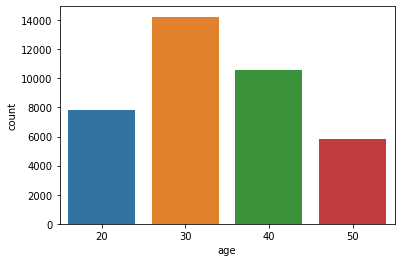

In [104]:
#우선주 
sns.countplot(data=preferred_stock, x='age')

<AxesSubplot:xlabel='age', ylabel='count'>

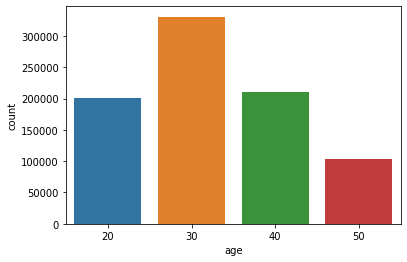

In [105]:
sns.countplot(data=df, x='age')

In [141]:
trading_df3 = trading_df.drop_duplicates('id')

In [144]:
age_train_count = pd.DataFrame(trading_df.groupby(['age'])['volume_price'].sum()).reset_index()
age_train_count

,age,volume_price
0,20,53510134065678544
1,30,93396442834159264
2,40,60060063105956336
3,50,27282288310802692


In [147]:
px.pie(age_train_count, values='volume_price', names='age', title='연령대별 총 거래대금 비율')

In [167]:
age_kospi_kosdaq = pd.DataFrame(df.groupby(['age', 'kospi_kosdaq'])['id'].count()).reset_index()

In [171]:
age_kospi_kosdaq

,age,kospi_kosdaq,id,0,1,2
0,20,2,87525,age,kospi_kosdaq,id
1,20,3,113494,age,kospi_kosdaq,id
2,30,2,148438,age,kospi_kosdaq,id
3,30,3,182259,age,kospi_kosdaq,id
4,40,2,104146,age,kospi_kosdaq,id
5,40,3,106041,age,kospi_kosdaq,id
6,50,2,50968,age,kospi_kosdaq,id
7,50,3,53069,age,kospi_kosdaq,id


In [189]:
px.bar(age_kospi_kosdaq, x='age', y='id', color='kospi_kosdaq', color_continuous_scale='darkmint')